# Import Required Libraries
Import necessary libraries such as pandas, numpy, matplotlib, and seaborn.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
from datetime import datetime
from dateutil.relativedelta import relativedelta

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

## Metodo para pasar el formato "XXAXXMXXSXXD"

In [ ]:
def convert_to_days_2(age_str):
    years = months = weeks = days = 0
    match = re.match(r'(?:(\d+)A)?(?:(\d+)M)?(?:(\d+)S)?(?:(\d+)D)?', age_str)

    if not match:
        raise ValueError(f"Formato de edad inválido: '{age_str}'")
    
    if match:
        if match.group(1):
            years = int(match.group(1))
        if match.group(2):
            months = int(match.group(2))
        if match.group(3):
            weeks = int(match.group(3))
        if match.group(4):
            days = int(match.group(4))
    
    start_date = datetime(1, 1, 1)
    end_date = start_date + relativedelta(years=years, months=months, weeks=weeks, days=days)
    total_days = (end_date - start_date).days
    return total_days

## Etiquetado de datos

In [ ]:
fileOrigin = "dicom_full_metadata.csv"

df = pd.read_csv(fileOrigin)

df['Género(0; 1)'] = df['Género(M; F)'].replace({'M': 0, 'F': 1})
df['Edad Cronológica(días)'] = df['Edad Cronológica(años)'].apply(convert_to_days_2)
df['Edad Ósea(días)'] = df['Edad Ósea(años)'].apply(convert_to_days_2)
df.to_csv('dicom_full_metadata_modified.csv', index=False)


## Limpieza de datos

In [4]:
import csv

# Lista de campos a eliminar
campos_a_eliminar = [
    "diagnostics_Versions_Numpy",
    "diagnostics_Versions_SimpleITK",
    "diagnostics_Versions_PyWavelet",
    "diagnostics_Versions_Python",
    "diagnostics_Configuration_Settings",
    "diagnostics_Configuration_EnabledImageTypes",
    "diagnostics_Image-original_Hash",
    "diagnostics_Image-original_Dimensionality",
    "diagnostics_Image-original_Spacing",
    "diagnostics_Image-original_Size",
    "diagnostics_Image-original_Mean",
    "diagnostics_Image-original_Minimum",
    "diagnostics_Image-original_Maximum",
    "diagnostics_Mask-original_Hash",
    "diagnostics_Mask-original_Spacing",
    "diagnostics_Mask-original_Size",
    "diagnostics_Mask-original_BoundingBox",
    "diagnostics_Mask-original_VoxelNum",
    "diagnostics_Mask-original_VolumeNum",
    "diagnostics_Mask-original_CenterOfMassIndex",
    "diagnostics_Mask-original_CenterOfMass"
]

# Ruta de entrada y salida
archivo_entrada = 'radiomics_features_otsu.csv'
archivo_salida = 'radiomics_features_otsu_filtrado.csv'

# Abrimos el archivo y escribimos la versión filtrada
with open(archivo_entrada, newline='', encoding='utf-8') as infile, \
     open(archivo_salida, 'w', newline='', encoding='utf-8') as outfile:
    
    lector = csv.DictReader(infile, delimiter=';')
    campos_filtrados = [campo for campo in lector.fieldnames if campo not in campos_a_eliminar]
    
    escritor = csv.DictWriter(outfile, fieldnames=campos_filtrados, delimiter=';')
    escritor.writeheader()
    
    for fila in lector:
        fila_filtrada = {campo: fila[campo] for campo in campos_filtrados}
        escritor.writerow(fila_filtrada)

print("Archivo filtrado creado como", archivo_salida)

# Abrimos el archivo y contamos los campos usando ";" como separador
with open(archivo_salida, newline='', encoding='utf-8') as csvfile:
    lector = csv.reader(csvfile, delimiter=';')
    encabezado = next(lector)  # Lee la primera fila
    cantidad_campos = len(encabezado)
    print(f'El archivo tiene {cantidad_campos} campos.')

Archivo filtrado creado como radiomics_features_otsu_filtrado.csv
El archivo tiene 102 campos.


## Mezcla de cvs para generación de csv de datos para entrenamiento

In [1]:
import pandas as pd

# Cargar los archivos CSV
dicom_df = pd.read_csv('dicom_data_final_final.csv', sep=',')

# radiomics_features_SAM_filtrado.csv
# radiomics_features_3dslicer_filtrado.csv

radiomics_df = pd.read_csv('radiomics_features_3dslicer_filtrado.csv', sep=';')

# Extraer el número del Folder (por ejemplo de 'dicom_data/1' sacar '1')
radiomics_df['Indicativo'] = radiomics_df['Folder'].apply(lambda x: int(str(x).split('/')[-1]))

# Hacer la unión SOLO de los que están en ambos archivos (inner join)
merged_df = pd.merge(dicom_df, radiomics_df, on='Indicativo', how='inner')

# Guardar el resultado
merged_df.to_csv('dicom_radiomics_merged_3dslicer.csv', index=False)

# Imprimir resumen
print("✅ Unión completada. Solo registros existentes en ambos archivos fueron guardados.")
print(f"Total de registros combinados: {len(merged_df)}")

✅ Unión completada. Solo registros existentes en ambos archivos fueron guardados.
Total de registros combinados: 479


# EDA

## Cargar el conjunto de datos

In [1]:
import pandas as pd
file_path = '..\data\dicom_radiomics_merged.csv'
df = pd.read_csv(file_path)
df.head()

,Indicativo,Género(0; 1),Edad Cronológica(días),Edad Ósea(días),Folder,diagnostics_Versions_PyRadiomics,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis
0,1.0,1,5082,4929,dicom_data/1,v3.0.1,0.503209,0.0,0.0,190.986440,...,791.194615,12303.632965,1.142800e+05,1.375971,1.556528e+05,0.000026,0.000020,0.915363,1.048988e+05,0.000018
1,4.0,0,3012,2738,dicom_data/4,v3.0.1,0.445465,0.0,0.0,173.423096,...,508.872461,130284.369778,2.557872e+06,3.523381,2.912270e+06,2.427567,0.034619,0.934402,2.472095e+06,0.000576
2,5.0,1,3742,4017,dicom_data/5,v3.0.1,0.443571,0.0,0.0,188.893590,...,775.469716,10606.683759,9.732237e+04,1.419896,1.357070e+05,0.000031,0.000023,0.906757,8.872207e+04,0.000021
3,6.0,1,3621,4383,dicom_data/6,v3.0.1,0.522879,0.0,0.0,183.673498,...,640.572706,15751.447497,1.393904e+05,1.365526,1.896626e+05,0.000023,0.000018,0.917524,1.280196e+05,0.000017
4,7.0,1,2556,3226,dicom_data/7,v3.0.1,0.439177,0.0,0.0,177.290732,...,716.610292,10090.140410,1.004194e+05,1.425343,1.417617e+05,0.000028,0.000021,0.905418,9.119247e+04,0.000020


## Revisar el conjunto de datos

In [2]:
df.head()

df.dtypes

df.info()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Columns: 106 entries, Indicativo to original_gldm_SmallDependenceLowGrayLevelEmphasis
dtypes: float64(101), int64(3), object(2)
memory usage: 398.5+ KB


,Indicativo,Género(0; 1),Edad Cronológica(días),Edad Ósea(días),Folder,diagnostics_Versions_PyRadiomics,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis
count,481.000000,481.000000,481.000000,481.000000,481,481,481.000000,481.0,481.0,481.000000,...,4.810000e+02,481.000000,4.810000e+02,481.000000,4.810000e+02,481.000000,481.000000,481.000000,4.810000e+02,481.000000
unique,NaN,NaN,NaN,NaN,481,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,dicom_data/227,v3.0.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1,481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,257.093555,0.513514,3762.193347,3863.282744,NaN,NaN,0.507984,0.0,0.0,223.425955,...,5.337733e+04,13307.325925,2.101983e+05,5.055949,3.598485e+05,1.192301,0.016030,0.751461,1.929588e+05,0.000518
std,144.560792,0.500338,1113.808024,1261.383139,NaN,NaN,0.081419,0.0,0.0,328.981293,...,4.512357e+05,34526.910937,4.302694e+05,10.305200,7.089393e+05,6.195467,0.077309,0.267993,4.017535e+05,0.001134
min,1.000000,0.000000,608.000000,546.000000,NaN,NaN,0.374230,0.0,0.0,99.647520,...,1.910024e+02,8.671662,8.394990e+01,1.079932,1.485354e+03,0.000005,0.000004,0.016057,1.407062e+01,0.000002
25%,134.000000,0.000000,2983.000000,2922.000000,NaN,NaN,0.460475,0.0,0.0,171.501019,...,6.755587e+02,2163.353834,1.172033e+04,1.382250,7.490821e+04,0.000023,0.000017,0.416314,3.907679e+03,0.000016
50%,260.000000,1.000000,3711.000000,4017.000000,NaN,NaN,0.496817,0.0,0.0,190.355537,...,8.308249e+02,10501.075100,9.791939e+04,1.420970,1.387581e+05,0.000034,0.000025,0.907221,8.994595e+04,0.000022
75%,382.000000,1.000000,4535.000000,4748.000000,NaN,NaN,0.531930,0.0,0.0,208.889371,...,8.310154e+03,14117.339855,1.403510e+05,6.519402,1.940918e+05,0.017897,0.001400,0.914431,1.280196e+05,0.000098


## Limpieza de datos

In [3]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

print("Missing values after filling:\n", df.isnull().sum())

duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df.drop_duplicates(inplace=True)

print("Number of duplicate rows after dropping:", df.duplicated().sum())

df.head()

Missing values in each column:
 Indicativo                                            0
Género(0; 1)                                          0
Edad Cronológica(días)                                0
Edad Ósea(días)                                       0
Folder                                                0
                                                     ..
original_gldm_LargeDependenceLowGrayLevelEmphasis     0
original_gldm_LowGrayLevelEmphasis                    0
original_gldm_SmallDependenceEmphasis                 0
original_gldm_SmallDependenceHighGrayLevelEmphasis    0
original_gldm_SmallDependenceLowGrayLevelEmphasis     0
Length: 106, dtype: int64
Missing values after filling:
 Indicativo                                            0
Género(0; 1)                                          0
Edad Cronológica(días)                                0
Edad Ósea(días)                                       0
Folder                                                0
               

,Indicativo,Género(0; 1),Edad Cronológica(días),Edad Ósea(días),Folder,diagnostics_Versions_PyRadiomics,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis
0,1.0,1,5082,4929,dicom_data/1,v3.0.1,0.503209,0.0,0.0,190.986440,...,791.194615,12303.632965,1.142800e+05,1.375971,1.556528e+05,0.000026,0.000020,0.915363,1.048988e+05,0.000018
1,4.0,0,3012,2738,dicom_data/4,v3.0.1,0.445465,0.0,0.0,173.423096,...,508.872461,130284.369778,2.557872e+06,3.523381,2.912270e+06,2.427567,0.034619,0.934402,2.472095e+06,0.000576
2,5.0,1,3742,4017,dicom_data/5,v3.0.1,0.443571,0.0,0.0,188.893590,...,775.469716,10606.683759,9.732237e+04,1.419896,1.357070e+05,0.000031,0.000023,0.906757,8.872207e+04,0.000021
3,6.0,1,3621,4383,dicom_data/6,v3.0.1,0.522879,0.0,0.0,183.673498,...,640.572706,15751.447497,1.393904e+05,1.365526,1.896626e+05,0.000023,0.000018,0.917524,1.280196e+05,0.000017
4,7.0,1,2556,3226,dicom_data/7,v3.0.1,0.439177,0.0,0.0,177.290732,...,716.610292,10090.140410,1.004194e+05,1.425343,1.417617e+05,0.000028,0.000021,0.905418,9.119247e+04,0.000020


## Resumen de estadisticas

In [4]:
# Summary Statistics

# Generate summary statistics for numerical columns
summary_statistics = df.describe()

# Display the summary statistics
summary_statistics

,Indicativo,Género(0; 1),Edad Cronológica(días),Edad Ósea(días),original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.0,481.0,481.000000,481.000000,481.000000,...,4.810000e+02,481.000000,4.810000e+02,481.000000,4.810000e+02,481.000000,481.000000,481.000000,4.810000e+02,481.000000
mean,257.093555,0.513514,3762.193347,3863.282744,0.507984,0.0,0.0,223.425955,146.715017,210.161894,...,5.337733e+04,13307.325925,2.101983e+05,5.055949,3.598485e+05,1.192301,0.016030,0.751461,1.929588e+05,0.000518
std,144.560792,0.500338,1113.808024,1261.383139,0.081419,0.0,0.0,328.981293,290.403152,195.358338,...,4.512357e+05,34526.910937,4.302694e+05,10.305200,7.089393e+05,6.195467,0.077309,0.267993,4.017535e+05,0.001134
min,1.000000,0.000000,608.000000,546.000000,0.374230,0.0,0.0,99.647520,72.224000,97.680000,...,1.910024e+02,8.671662,8.394990e+01,1.079932,1.485354e+03,0.000005,0.000004,0.016057,1.407062e+01,0.000002
25%,134.000000,0.000000,2983.000000,2922.000000,0.460475,0.0,0.0,171.501019,102.860000,171.886000,...,6.755587e+02,2163.353834,1.172033e+04,1.382250,7.490821e+04,0.000023,0.000017,0.416314,3.907679e+03,0.000016
50%,260.000000,1.000000,3711.000000,4017.000000,0.496817,0.0,0.0,190.355537,115.736000,191.364000,...,8.308249e+02,10501.075100,9.791939e+04,1.420970,1.387581e+05,0.000034,0.000025,0.907221,8.994595e+04,0.000022
75%,382.000000,1.000000,4535.000000,4748.000000,0.531930,0.0,0.0,208.889371,127.280000,208.680000,...,8.310154e+03,14117.339855,1.403510e+05,6.519402,1.940918e+05,0.017897,0.001400,0.914431,1.280196e+05,0.000098
max,502.000000,1.000000,6482.000000,9496.000000,0.998219,0.0,0.0,3420.111586,2970.000000,2096.000000,...,4.448738e+06,515403.197370,2.886515e+06,77.104596,4.394203e+06,45.924122,0.574964,0.980333,2.746805e+06,0.007335


## Distribución de genero

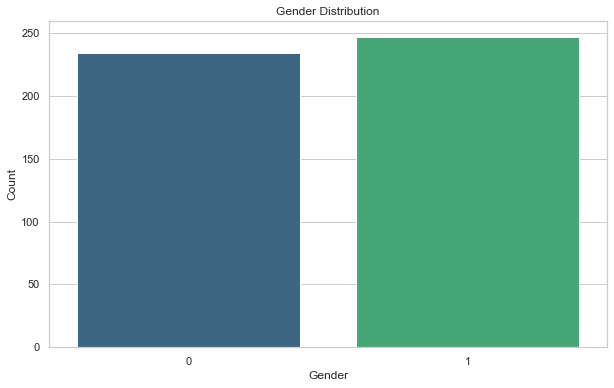

In [7]:
# Visualize Gender Distribution

# Create a bar plot to visualize the distribution of gender in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Género(0; 1)", palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribución de edad

In [8]:
def convert_days_to_years(label):
    start, end = map(int, label.strip('[]').replace(')', '').split(','))
    return f"[{start // 365}, {end // 365})"

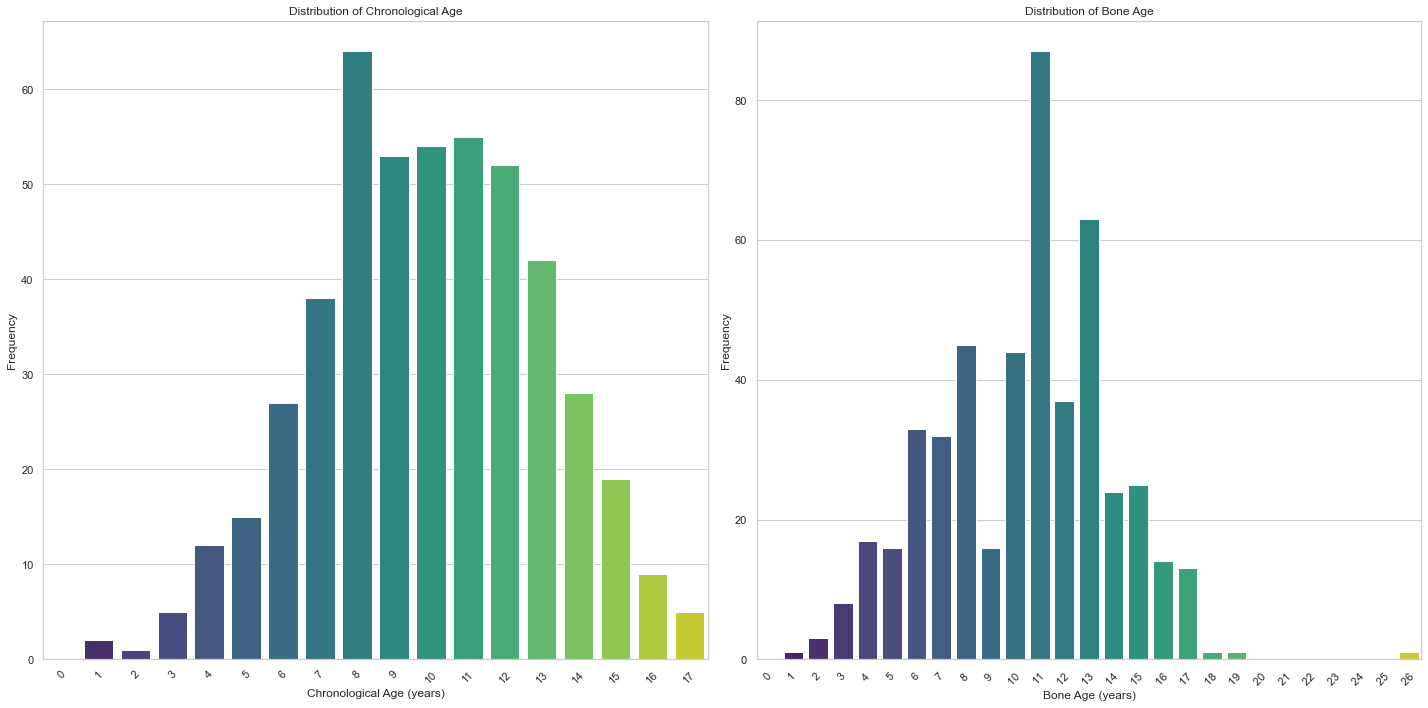

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Asegurarse de que las columnas son numéricas
df['Edad Cronológica(días)'] = pd.to_numeric(df['Edad Cronológica(días)'])
df['Edad Ósea(días)'] = pd.to_numeric(df['Edad Ósea(días)'])

# Definir los bins por edad en días (1 año = 365 días)
bins_crono = np.arange(0, df["Edad Cronológica(días)"].max() + 365, 365)
bins_osea = np.arange(0, df["Edad Ósea(días)"].max() + 365, 365)

# Agrupar edades en días por intervalos anuales
df["grupo_cronologica"] = pd.cut(df["Edad Cronológica(días)"], bins=bins_crono, right=False)
df["grupo_osea"] = pd.cut(df["Edad Ósea(días)"], bins=bins_osea, right=False)

# Obtener conteos
group_counts_crono = df["grupo_cronologica"].value_counts().sort_index()
group_counts_osea = df["grupo_osea"].value_counts().sort_index()

# Convertir los índices de intervalos de días a texto de edades en años
labels_crono = [f"{int(i.left // 365)}" for i in group_counts_crono.index]
labels_osea = [f"{int(i.left // 365)} " for i in group_counts_osea.index]

# Plot
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=labels_crono, y=group_counts_crono.values, palette="viridis")
plt.title('Distribution of Chronological Age')
plt.xlabel('Chronological Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=labels_osea, y=group_counts_osea.values, palette="viridis")
plt.title('Distribution of Bone Age')
plt.xlabel('Bone Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [10]:
# Calcular la diferencia entre edades
df['Diferencia Edad'] = abs(df['Edad Cronológica(días)'] - df['Edad Ósea(días)'])
df['Diferencia Edad']

0      153
1      274
2      275
3      762
4      670
      ... 
476    155
477    638
478    416
479     61
480    380
Name: Diferencia Edad, Length: 481, dtype: int64

In [11]:
# Separar por género
df_masculino = df[df['Género(0; 1)'] == 0]
df_femenino = df[df['Género(0; 1)'] == 1]
df_femenino

,Indicativo,Género(0; 1),Edad Cronológica(días),Edad Ósea(días),Folder,diagnostics_Versions_PyRadiomics,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_JointAverage,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_Imc1,original_glcm_Imc2,original_glcm_Idm,original_glcm_Idmn,original_glcm_Id,original_glcm_Idn,original_glcm_InverseVariance,original_glcm_MaximumProbability,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,grupo_cronologica,grupo_osea,Diferencia Edad
0,1.0,1,5082,4929,dicom_data/1,v3.0.1,0.503209,0.0,0.0,190.986440,120.620,192.696,197.533155,197.533155,6133.946876,96.106062,0.113956,14220.188643,2.318277,6201.526192,28887.0,36088.0,2.988469e+14,8.737002,3873.0,2.847896,43514.0,2240.253597,32370.476450,32167.0,24422.0,19092.0,1597.433162,32489.033172,0.351195,6.545942e+12,0.002795,7.689531e+06,114429.690576,320.924747,6.298299e+09,3.753750e+06,47180.659205,1433.252951,0.941001,28.486305,6.243537,602.577489,0.000028,15.649521,-0.206733,

In [12]:
print("Estadísticas General:")
print(df[['Edad Cronológica(días)', 'Edad Ósea(días)', 'Diferencia Edad']].describe())

Estadísticas General:
       Edad Cronológica(días)  Edad Ósea(días)  Diferencia Edad
count              481.000000       481.000000       481.000000
mean              3762.193347      3863.282744       386.112266
std               1113.808024      1261.383139       355.196841
min                608.000000       546.000000         0.000000
25%               2983.000000      2922.000000       151.000000
50%               3711.000000      4017.000000       334.000000
75%               4535.000000      4748.000000       549.000000
max               6482.000000      9496.000000      3653.000000


In [13]:
print("Estadísticas Masculino:")
print(df_masculino[['Edad Cronológica(días)', 'Edad Ósea(días)', 'Diferencia Edad']].describe())


Estadísticas Masculino:
       Edad Cronológica(días)  Edad Ósea(días)  Diferencia Edad
count              234.000000       234.000000       234.000000
mean              4094.713675      4069.970085       378.162393
std               1157.816262      1345.577083       301.228100
min                691.000000       730.000000         0.000000
25%               3287.000000      2922.000000       151.500000
50%               4261.000000      4473.500000       365.000000
75%               4983.250000      4929.000000       573.250000
max               6482.000000      6939.000000      1736.000000


In [14]:
print("\nEstadísticas Femenino:")
print(df_femenino[['Edad Cronológica(días)', 'Edad Ósea(días)', 'Diferencia Edad']].describe())


Estadísticas Femenino:
       Edad Cronológica(días)  Edad Ósea(días)  Diferencia Edad
count              247.000000       247.000000       247.000000
mean              3447.174089      3667.473684       393.643725
std                972.680530      1144.784372       400.143585
min                608.000000       546.000000         0.000000
25%               2904.000000      2861.000000       151.000000
50%               3346.000000      3833.000000       306.000000
75%               4050.500000      4184.000000       518.000000
max               6209.000000      9496.000000      3653.000000


In [15]:
umbral = 365
casos_extremos = df[df['Diferencia Edad'] > umbral]
print(f"\nCasos con diferencia mayor a {umbral} dias:")
print(casos_extremos[['Indicativo', 'Género(0; 1)', 'Edad Cronológica(días)', 'Edad Ósea(días)', 'Diferencia Edad']])


Casos con diferencia mayor a 365 dias:
     Indicativo  Género(0; 1)  Edad Cronológica(días)  Edad Ósea(días)  \
3           6.0             1                    3621             4383   
4           7.0             1                    2556             3226   
7          10.0             1                    3621             4017   
12         15.0             0                    2281             1642   
17         22.0             1                    2922             3652   
..          ...           ...                     ...              ...   
474       496.0             1                    1893             1520   
475       497.0             0                    3772             4929   
477       499.0             0                    2099             1461   
478       500.0             1                    2261             2677   
480       502.0             0                    5493             5113   

     Diferencia Edad  
3                762  
4                670  
7 

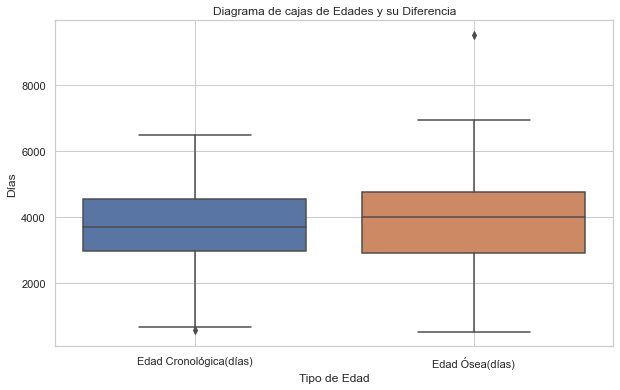

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar los datos
df_melted = df[['Edad Cronológica(días)', 'Edad Ósea(días)']].melt(var_name='Tipo de Edad', value_name='Días')

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de Edad', y='Días', data=df_melted)

plt.title('Diagrama de cajas de Edades y su Diferencia')
plt.grid(True)
plt.show()

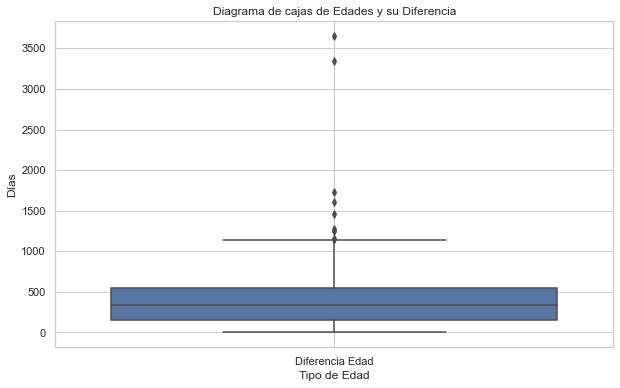

In [18]:
'Diferencia Edad'
df_melted = df[['Diferencia Edad']].melt(var_name='Tipo de Edad', value_name='Días')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo de Edad', y='Días', data=df_melted)

plt.title('Diagrama de cajas de Edades y su Diferencia')
plt.grid(True)
plt.show()

In [8]:
corr=df.corr()
corr["Edad Ósea(días)"].sort_values(ascending=False)

Edad Ósea(días)                          1.000000
Edad Cronológica(días)                   0.913327
original_glrlm_RunLengthNonUniformity    0.675912
original_glszm_SizeZoneNonUniformity     0.437846
original_firstorder_Energy               0.331949
                                           ...   
Género(0; 1)                            -0.159653
original_shape_Sphericity               -0.569560
original_shape_SurfaceVolumeRatio       -0.655678
original_shape_Flatness                       NaN
original_shape_LeastAxisLength                NaN
Name: Edad Ósea(días), Length: 104, dtype: float64

In [15]:
def contar_outliers(columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return len(outliers)

columnas = ['Edad Cronológica(días)', 'Edad Ósea(días)', 'Diferencia Edad']
for col in columnas:
    cantidad = contar_outliers(col)
    print(f"{col}: {cantidad} outliers")

Edad Cronológica(días): 1 outliers
Edad Ósea(días): 1 outliers
Diferencia Edad: 9 outliers


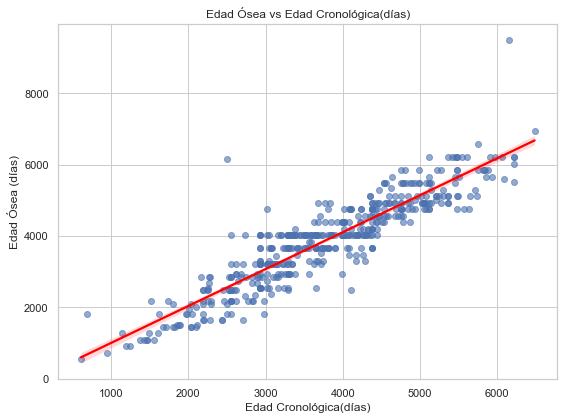

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

var='Edad Cronológica(días)'
# Asegurarse de que los datos sean numéricos
df[var] = pd.to_numeric(df[var], errors='coerce')
df['Edad Ósea(días)'] = pd.to_numeric(df['Edad Ósea(días)'], errors='coerce')

# Eliminar filas con NaN (opcional pero recomendable)
df_clean = df.dropna(subset=[var, 'Edad Ósea(días)'])

# Crear la gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(
    x=var,
    y='Edad Ósea(días)',
    data=df_clean,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)

plt.title(f'Edad Ósea vs {var}')
plt.xlabel(var)
plt.ylabel('Edad Ósea (días)')
plt.grid(True)
plt.tight_layout()
plt.show()


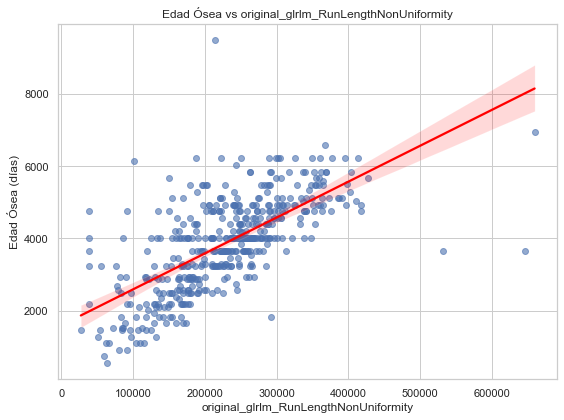

In [20]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

var='original_glrlm_RunLengthNonUniformity'
# Asegurarse de que los datos sean numéricos
df[var] = pd.to_numeric(df[var], errors='coerce')
df['Edad Ósea(días)'] = pd.to_numeric(df['Edad Ósea(días)'], errors='coerce')

# Eliminar filas con NaN (opcional pero recomendable)
df_clean = df.dropna(subset=[var, 'Edad Ósea(días)'])

# Crear la gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(
    x=var,
    y='Edad Ósea(días)',
    data=df_clean,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)

plt.title(f'Edad Ósea vs {var}')
plt.xlabel(var)
plt.ylabel('Edad Ósea (días)')
plt.grid(True)
plt.tight_layout()
plt.show()

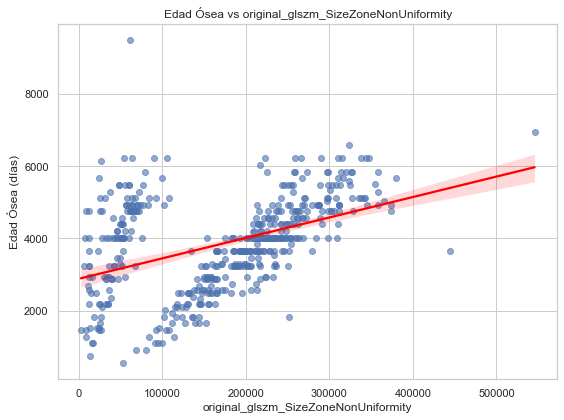

In [24]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

var='original_glszm_SizeZoneNonUniformity'
# Asegurarse de que los datos sean numéricos
df[var] = pd.to_numeric(df[var], errors='coerce')
df['Edad Ósea(días)'] = pd.to_numeric(df['Edad Ósea(días)'], errors='coerce')

# Eliminar filas con NaN (opcional pero recomendable)
df_clean = df.dropna(subset=[var, 'Edad Ósea(días)'])

# Crear la gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(
    x=var,
    y='Edad Ósea(días)',
    data=df_clean,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)

plt.title(f'Edad Ósea vs {var}')
plt.xlabel(var)
plt.ylabel('Edad Ósea (días)')
plt.grid(True)
plt.tight_layout()
plt.show()

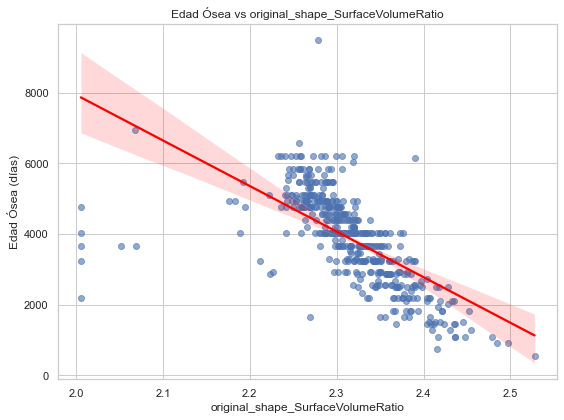

In [25]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

var='original_shape_SurfaceVolumeRatio'
# Asegurarse de que los datos sean numéricos
df[var] = pd.to_numeric(df[var], errors='coerce')
df['Edad Ósea(días)'] = pd.to_numeric(df['Edad Ósea(días)'], errors='coerce')

# Eliminar filas con NaN (opcional pero recomendable)
df_clean = df.dropna(subset=[var, 'Edad Ósea(días)'])

# Crear la gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(
    x=var,
    y='Edad Ósea(días)',
    data=df_clean,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)

plt.title(f'Edad Ósea vs {var}')
plt.xlabel(var)
plt.ylabel('Edad Ósea (días)')
plt.grid(True)
plt.tight_layout()
plt.show()

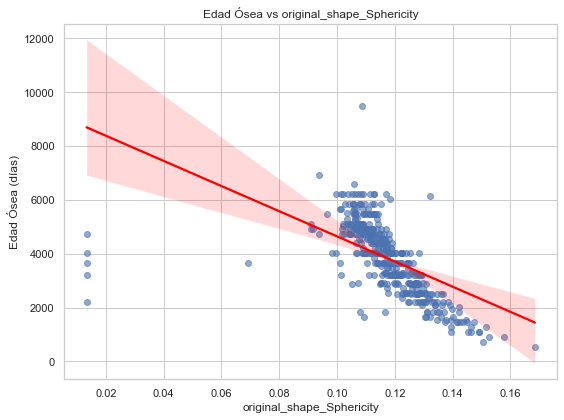

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

var='original_shape_Sphericity'
# Asegurarse de que los datos sean numéricos
df[var] = pd.to_numeric(df[var], errors='coerce')
df['Edad Ósea(días)'] = pd.to_numeric(df['Edad Ósea(días)'], errors='coerce')

# Eliminar filas con NaN (opcional pero recomendable)
df_clean = df.dropna(subset=[var, 'Edad Ósea(días)'])

# Crear la gráfica de dispersión con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(
    x=var,
    y='Edad Ósea(días)',
    data=df_clean,
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)

plt.title(f'Edad Ósea vs {var}')
plt.xlabel(var)
plt.ylabel('Edad Ósea (días)')
plt.grid(True)
plt.tight_layout()
plt.show()